In [4]:
import os
os.getcwd() 

'/Users/kimjongphil/Documents/GitHub/python_ex/Pandas/Project'

### 실제 기업 환경에서 Pandas는 데이터 처리, 분석, 보고서 작성 등 다양한 업무에 사용됩니다. 
### 기업에서 활용되는 Pandas 코드 예시를 통해 왜 해당 방식으로 데이터를 처리하는지, 그리고 그 동작 순서까지 설명드리겠습니다. 
### 아래에서는 매출 분석, 고객 세그먼트화, 주식 데이터 분석을 중심으로 세 가지 실전 예시를 제공하겠습니다.

In [27]:
import pandas as pd

# 1. **매출 분석 (Sales Analysis)** CSV 데이터 생성

sales_data = {
    'Sales_Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
                   '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South'],
    'Product': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'B'],
    'Sales': [1000, 1500, 1200, 1300, 1100, 1400, 1150, 1250, 1050, 1600]
}

df_sales = pd.DataFrame(sales_data)

# 2. **고객 세그먼트화 (Customer Segmentation)** CSV 데이터 생성
customer_data = {
    'Customer_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Age': [24, 27, 22, 35, 29, 40, 28, 32, 23, 45],
    'Purchase_Amount': [500, 600, 450, 800, 700, 850, 400, 750, 550, 900]
}

df_customer = pd.DataFrame(customer_data)

# 3. **주식 데이터 분석 (Stock Data Analysis)** CSV 데이터 생성
stock_data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
             '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'Close': [150, 153, 149, 155, 158, 157, 160, 162, 165, 168]
}

df_stock = pd.DataFrame(stock_data)

# 데이터프레임을 CSV 파일로 저장
df_sales.to_csv('./data/sales_data.csv', index=False)
df_customer.to_csv('./data/customer_data.csv', index=False)
df_stock.to_csv('./data/stock_data.csv', index=False)

# 데이터 프레임 출력
df_sales.head(), df_customer.head(), df_stock.head()


(   Sales_Date Region Product  Sales
 0  2023-01-01  North       A   1000
 1  2023-01-02  South       B   1500
 2  2023-01-03   East       C   1200
 3  2023-01-04   West       D   1300
 4  2023-01-05  North       A   1100,
    Customer_ID     Name  Age  Purchase_Amount
 0            1    Alice   24              500
 1            2      Bob   27              600
 2            3  Charlie   22              450
 3            4    David   35              800
 4            5      Eva   29              700,
          Date  Close
 0  2023-01-01    150
 1  2023-01-02    153
 2  2023-01-03    149
 3  2023-01-04    155
 4  2023-01-05    158)

In [ ]:
import pandas as pd 

# 주식 데이터 예시 (Date와 Close 열 포함)
stock_data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
             '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
    'Close': [150, 153, 149, 155, 158, 157, 160, 162, 165, 168]  # 주식 종가 데이터
}

# 데이터프레임 생성
df_stock = pd.DataFrame(stock_data)

# Date 열을 날짜 형식으로 변환
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# 데이터를 CSV 파일로 저장
df_stock.to_csv('./data/stock_data.csv', index=False)

# 데이터 확인
print(df_stock)

        Date  Close
0 2023-01-01    150
1 2023-01-02    153
2 2023-01-03    149
3 2023-01-04    155
4 2023-01-05    158
5 2023-01-06    157
6 2023-01-07    160
7 2023-01-08    162
8 2023-01-09    165
9 2023-01-10    168


## 1. 매출 분석 (Sales Analysis)
- 목표: 주어진 매출 데이터를 바탕으로 지역별, 제품별 매출을 분석하여, 특정 지역에서 판매가 부진한 제품을 파악

In [30]:
import pandas as pd

# 매출 데이터 로드
df = pd.read_csv('data/sales_data.csv')
print("--------------------------------------------------------")
print(df)
print("--------------------------------------------------------")

# 데이터 탐색 (결측치, 중복, 형식 변환 확인)
df['Sales_Date'] = pd.to_datetime(df['Sales_Date'])  # 날짜 형식 변환

# 결측치 처리: 결측치가 있는 행은 삭제
df_cleaned = df.dropna()

# 지역별 매출 합계 계산
regional_sales = df_cleaned.groupby('Region')['Sales'].sum()

# 제품별 매출 합계 계산
product_sales = df_cleaned.groupby('Product')['Sales'].sum()

# 지역별 매출 상위 2개
top_regions = regional_sales.nlargest(2)
print(top_regions)

# 제품별 매출 상위 2개
top_products = product_sales.nlargest(2)
print(top_products)


--------------------------------------------------------
   Sales_Date Region Product  Sales
0  2023-01-01  North       A   1000
1  2023-01-02  South       B   1500
2  2023-01-03   East       C   1200
3  2023-01-04   West       D   1300
4  2023-01-05  North       A   1100
5  2023-01-06  South       B   1400
6  2023-01-07   East       C   1150
7  2023-01-08   West       D   1250
8  2023-01-09  North       A   1050
9  2023-01-10  South       B   1600
--------------------------------------------------------
Region
South    4500
North    3150
Name: Sales, dtype: int64
Product
B    4500
A    3150
Name: Sales, dtype: int64


## 구성한 이유:
- dropna(): 결측치가 있는 데이터는 분석에 영향을 미칠 수 있으므로, 이를 삭제하여 깨끗한 데이터를 유지합니다.
- groupby(): groupby()는 데이터를 특정 기준으로 그룹화하여 집계할 수 있는 매우 중요한 메서드입니다. 
            매출 데이터를 지역별, 제품별로 그룹화하여 합계를 계산하고, 유의미한 인사이트를 도출합니다.
- nlargest(): 상위 5개의 매출 데이터를 추출하여, 가장 중요한 분석 결과를 빠르게 도출할 수 있습니다.
## 동작 순서:
- 데이터 로드: CSV 파일에서 매출 데이터를 불러옵니다.
- 결측치 처리: 결측치를 처리하여 분석에 영향을 미치지 않도록 합니다.
- 그룹화: groupby()를 사용하여 지역별 및 제품별로 매출 합계를 계산합니다.
- 상위 값 추출: nlargest()를 사용하여 매출이 높은 상위 5개 지역과 제품을 도출합니다.

------------------------------------------------------------------------------------------------------------------------
# 1. 매출 분석: groupby()와 filter() 사용
- 매출 데이터를 지역별, 제품별로 분석하고, 매출이 1200 이상인 지역만 필터링해서 보고하는 방법입니다.

In [31]:
# 매출 데이터 불러오기
df_sales = pd.read_csv('./data/sales_data.csv')
print("--------------------------------------------------------")
print(df)
print("--------------------------------------------------------")

# 지역별 매출 합계 계산
region_sales = df_sales.groupby('Region')['Sales'].sum()
print("지역별 매출 합계:")
print(region_sales)

# 제품별 매출 합계 계산
product_sales = df_sales.groupby('Product')['Sales'].sum()
print("\n제품별 매출 합계:")
print(product_sales)

# 매출이 1200 이상인 지역만 필터링
high_sales_regions = region_sales[region_sales >= 1200]
print("\n매출이 1200 이상인 지역:")
print(high_sales_regions)


--------------------------------------------------------
  Sales_Date Region Product  Sales
0 2023-01-01  North       A   1000
1 2023-01-02  South       B   1500
2 2023-01-03   East       C   1200
3 2023-01-04   West       D   1300
4 2023-01-05  North       A   1100
5 2023-01-06  South       B   1400
6 2023-01-07   East       C   1150
7 2023-01-08   West       D   1250
8 2023-01-09  North       A   1050
9 2023-01-10  South       B   1600
--------------------------------------------------------
지역별 매출 합계:
Region
East     2350
North    3150
South    4500
West     2550
Name: Sales, dtype: int64

제품별 매출 합계:
Product
A    3150
B    4500
C    2350
D    2550
Name: Sales, dtype: int64

매출이 1200 이상인 지역:
Region
East     2350
North    3150
South    4500
West     2550
Name: Sales, dtype: int64


## 동작 순서:
- **groupby()**를 사용해 Region 및 Product별로 매출 합계를 계산합니다.
- Sales 값이 1200 이상인 지역을 필터링하여, 매출이 높은 지역을 파악합니다.


------------------------------------------------------------------------------------------------------------------------
# 2. 고객 세그먼트화: groupby()와 apply() 사용
- 고객을 나이대별로 그룹화하고, 각 그룹의 평균 구매 금액을 계산하는 방법입니다.

In [33]:
# 고객 데이터 불러오기
df_customer = pd.read_csv('./data/customer_data.csv')
print("--------------------------------------------------------")
print(df_customer)
print("--------------------------------------------------------")

# 나이대별 고객 세그먼트화
bins = [0, 18, 30, 40, 50, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51+']
df_customer['Age_Group'] = pd.cut(df_customer['Age'], bins=bins, labels=labels)

# 나이대별 평균 구매 금액 계산
age_group_avg_purchase = df_customer.groupby('Age_Group')['Purchase_Amount'].mean()
print("\n나이대별 평균 구매 금액:")
print(age_group_avg_purchase)


--------------------------------------------------------
   Customer_ID     Name  Age  Purchase_Amount
0            1    Alice   24              500
1            2      Bob   27              600
2            3  Charlie   22              450
3            4    David   35              800
4            5      Eva   29              700
5            6    Frank   40              850
6            7    Grace   28              400
7            8     Hank   32              750
8            9      Ivy   23              550
9           10     Jack   45              900
--------------------------------------------------------

나이대별 평균 구매 금액:
Age_Group
0-18            NaN
19-30    533.333333
31-40    800.000000
41-50    900.000000
51+             NaN
Name: Purchase_Amount, dtype: float64


/var/folders/h8/dk4pn1l11_5f5z7pscs8gr0r0000gn/T/ipykernel_4260/1926230717.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_purchase = df_customer.groupby('Age_Group')['Purchase_Amount'].mean()


## 동작 순서:
- **pd.cut()**을 사용하여 나이를 기준으로 고객을 세그먼트화합니다.
- **groupby()**와 **mean()**을 사용하여 각 나이대의 평균 구매 금액을 계산합니다.

## 3. 주식 데이터 분석 (Stock Data Analysis)
- 목표: 주식 가격 데이터를 바탕으로 이동 평균을 계산하고, 주식의 가격 트렌드를 분석하여, 특정 기간의 이동 평균을 비교

--------------------------------------------------------
         Date  Close
0  2023-01-01    150
1  2023-01-02    153
2  2023-01-03    149
3  2023-01-04    155
4  2023-01-05    158
5  2023-01-06    157
6  2023-01-07    160
7  2023-01-08    162
8  2023-01-09    165
9  2023-01-10    168
--------------------------------------------------------
        Date  Close   MA_2   MA_5
0 2023-01-01    150    NaN    NaN
1 2023-01-02    153  151.5    NaN
2 2023-01-03    149  151.0    NaN
3 2023-01-04    155  152.0    NaN
4 2023-01-05    158  156.5  153.0
5 2023-01-06    157  157.5  154.4
6 2023-01-07    160  158.5  155.8
7 2023-01-08    162  161.0  158.4
8 2023-01-09    165  163.5  160.4
9 2023-01-10    168  166.5  162.4


<Axes: title={'center': 'Stock Price and Moving Averages'}, xlabel='Date'>

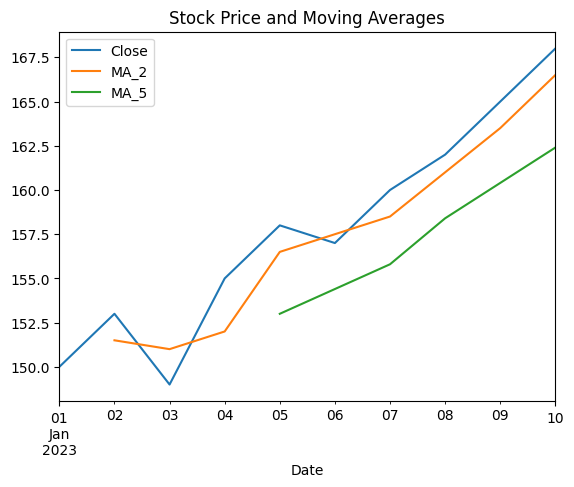

In [35]:
import pandas as pd

# 주식 데이터 로드
df = pd.read_csv('data/stock_data.csv')
print("--------------------------------------------------------")
print(df)
print("--------------------------------------------------------")


# 날짜 형식 변환
df['Date'] = pd.to_datetime(df['Date'])

# 20일, 50일 이동 평균 계산
df['MA_2'] = df['Close'].rolling(window=2).mean()
df['MA_5'] = df['Close'].rolling(window=5).mean()

print(df[['Date', 'Close', 'MA_2', 'MA_5']])

# 이동 평균과 주가 비교
df[['Date', 'Close', 'MA_2', 'MA_5']].plot(x='Date', title='Stock Price and Moving Averages')


------------------------------------------------------------------------------------------------------------------------
# 3. 주식 데이터 분석: 이동 평균 (rolling() 사용)
- 주식 가격 데이터를 바탕으로 20일과 50일 이동 평균을 계산하여, 주식 가격 트렌드를 분석하는 방법입니다.

In [36]:
# 주식 데이터 불러오기
df_stock = pd.read_csv('./data/stock_data.csv')
print("--------------------------------------------------------")
print(df_stock)
print("--------------------------------------------------------")

# 20일, 50일 이동 평균 계산
df_stock['MA_3'] = round(df_stock['Close'].rolling(window=3).mean(),1) 
df_stock['MA_5'] = round(df_stock['Close'].rolling(window=5).mean(),1) 

# 이동 평균과 주식 가격 비교
print("\n주식 가격과 이동 평균:")
print(df_stock[['Date', 'Close', 'MA_3', 'MA_5']])


--------------------------------------------------------
         Date  Close
0  2023-01-01    150
1  2023-01-02    153
2  2023-01-03    149
3  2023-01-04    155
4  2023-01-05    158
5  2023-01-06    157
6  2023-01-07    160
7  2023-01-08    162
8  2023-01-09    165
9  2023-01-10    168
--------------------------------------------------------

주식 가격과 이동 평균:
         Date  Close   MA_3   MA_5
0  2023-01-01    150    NaN    NaN
1  2023-01-02    153    NaN    NaN
2  2023-01-03    149  150.7    NaN
3  2023-01-04    155  152.3    NaN
4  2023-01-05    158  154.0  153.0
5  2023-01-06    157  156.7  154.4
6  2023-01-07    160  158.3  155.8
7  2023-01-08    162  159.7  158.4
8  2023-01-09    165  162.3  160.4
9  2023-01-10    168  165.0  162.4


- groupby(): 데이터를 특정 기준으로 그룹화하고 집계하는 데 사용됩니다. 이를 통해 각 그룹별로 유의미한 정보를 도출할 수 있습니다.
- filter(): 특정 조건에 맞는 데이터를 필터링할 때 사용됩니다. 예를 들어, 매출이 1200 이상인 지역만 선택하거나, 고객의 평균 구매 금액을 비교하는 데 유용합니다.
- rolling(): 시계열 데이터를 다룰 때, 이동 평균을 계산하여 트렌드를 분석할 수 있습니다.